<a href="https://colab.research.google.com/github/rafaeldjsm/Data_Science/blob/master/ORCAMENTO/graph_curvaS_orcafascio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   400  100   400    0     0   2185      0 --:--:-- --:--:-- --:--:--  2185


Saving 21221.000020_2018-93 - Cronograma.xlsx to 21221.000020_2018-93 - Cronograma.xlsx


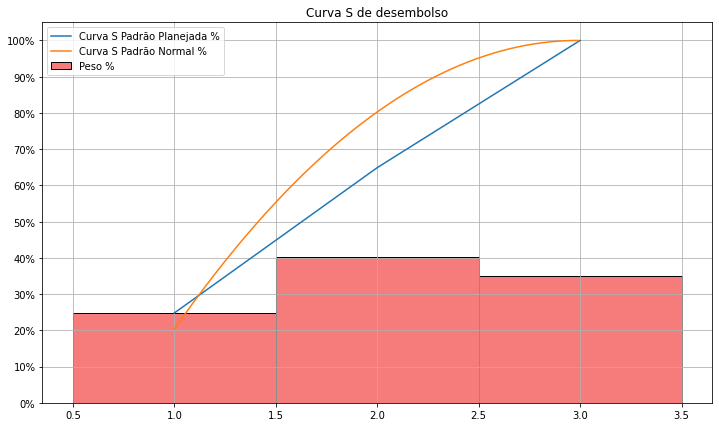

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
from matplotlib import ticker
from scipy.interpolate import interp1d
!curl -O https://raw.githubusercontent.com/rafaeldjsm/Engenharia/main/ORCAMENTO/curvasn.py
%run curvasn.py

uploaded = files.upload()

df = pd.read_excel(*list(uploaded.keys()))

l, c = (int(k) for k in np.where(df=='Porcentagem'))

df2 = df.iloc[l,c+1:].copy()
df2.dropna(inplace = True)

df2 = df2.apply(lambda x:str(x).replace(',','.').replace('%','')).astype(float)

x = np.array([*range(1,len(df2)+1)])
y = df2.values
yac = np.cumsum(y) #
yac2 = cvsn(len(df2))[0]*100

plt.figure(figsize=(12,7))
plt.plot(x,yac,label = "Curva S Padrão Planejada %")

# x smooth
xsmoo = np.arange(1,len(df2),0.01)
ysmoo = interp1d(x, yac2, kind = 'quadratic')
plt.plot(xsmoo,ysmoo(xsmoo),label = "Curva S Padrão Normal %")
plt.bar(x=x, height= y, data = df2, width = 1, edgecolor = 'black', color = '#f67c7c',label = "Peso %")
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter())
plt.yticks(np.arange(0,110,10))
plt.grid()
plt.title("Curva S de desembolso")
plt.legend()
plt.show()